In [17]:
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

La dernière partie de ce projet porte sur l'étude de modèles à volatilité stochastique. Dans cette partie, on utilisera une discrétisation de l'équation différentielle vérifiée par le prix du produit dérivé pour étudier sa dynamique au cours du temps. Sous la mesure martingale neutre, on a l'équation différentielle stochastique suivante :
$$ 
dS_t = r S_tdt + \sqrt{v_t} S_t dZ_1^Q(t) \\
dv_t = \alpha(t,S_t,v_t)dt + \beta(t,S_t,v_t)dZ_2^Q(t), \qquad et \; [Z_1^Q,Z_2^Q]_t = \rho t
$$
On étudiera plusieurs schémas de discrétisation de l'équation : 
 - le schéma d'Euler 
 - le schéma de Milstein

## EDS de Black & Scholes avec un schéma d’Euler et un schéma de Milstein

Dans cette première partie, on va simuler une trajectoire de l'actif risqué en utilisant les différents schémas de discrétisation. On choisit une dynamique de Black-Scholes car on connait une solution explicite, ce qui permettra d'étudier l'évolution de l'erreur d'approximation commise en fonction du pas de discrétisation.

On a donc : $dS_t = rS_tdt + \sigma S_t dB_t^Q$.

Dans ce cas, on obtient les équations de discrétisation suivantes : 
 - Schéma d'Euler  :  $S_{t+h} = S_t + hrS_t + \sqrt{h} \sqrt{\sigma}S_t Z, \quad avec \; Z\sim \mathcal{N}(0,1)$
 - Schéma de Milstein :  $S_{t+h} = S_t + hrS_t + \sqrt{h} \sqrt{\sigma}S_t Z + \frac{1}{2} \sigma^2 S_t h (Z^2-1), \quad avec \; Z\sim \mathcal{N}(0,1)$
 
On va tracer l'évolution de l'actif risqué au cours du temps selon la dynamique exacte, avec l'approximation d'Euler et l'approximation de Milstein. On tracera ensuite l'évolution de l'erreur d'approximation commise au cours du temps.

In [18]:
def simuleTrajectoireEDS(S0,T,r,sigma,h,N):
        
        """ Simule une trajectoire de l'actif risqué en utilisant une discrétisation de l'EDS de Black-Scholes.
        """
        
        Z = np.random.normal(0, 1, (int(T/h),N))
        
        prix_exacte = S0*np.prod(np.exp((r  - 0.5*sigma**2) * h + sigma * np.sqrt(h) * Z),axis=0)
        
        prix_euler = S0 * np.prod( 1 + r*h + sigma * np.sqrt(h) * Z,axis=0)
        
        prix_milstein = S0 * np.prod( 1 + r*h + sigma*np.sqrt(h)*Z + 0.5 * sigma**2  * h * (Z**2 - 1),axis=0)
        
            
        return prix_exacte, prix_euler, prix_milstein

#### Analyse des ordres d'erreur

 Le schéma d'Euler est d'ordre faible 1 et d'ordre fort $\frac{1}{2}$, le schéma de Milstein est d'ordre fort et faible 1. Afin de retrouver ces ordres, on va pour une série de pas de temps différents estimer deux quantités grâce à des simulations de Monte-Carlo : 
 - Pour l'erreur faible : $\left| \mathbb{E}(\hat{X_T}) - \mathbb{E}(X_T) \right|$
 - Pour l'erreur forte  : $\mathbb{E}(|\hat{X_T}-X_T|)$
 
 On trace les erreurs commises en fonction du nombre d'itérations avec une échelle normale puis logarithmique.

In [19]:
def erreur(S0,T,r,sigma,list_h,N):
    
    erreur_fort_euler = []
    erreur_fort_milstein = []
    
    erreur_faible_euler = []
    erreur_faible_milstein =[]
    
    for h in list_h:
        prix_exacte, prix_euler, prix_milstein = simuleTrajectoireEDS(S0,T,r,sigma,h,N)
        
        erreur_fort_euler.append(  np.mean(np.abs(prix_exacte-prix_euler))  )
        erreur_fort_milstein.append(  np.mean(np.abs(prix_exacte-prix_milstein))  )
        
        erreur_faible_euler.append(  np.abs(np.mean(prix_exacte)-np.mean(prix_euler))  )
        erreur_faible_milstein.append(  np.abs(np.mean(prix_exacte)-np.mean(prix_milstein))  )
    
    return erreur_fort_euler, erreur_fort_milstein, erreur_faible_euler, erreur_faible_milstein 

Text(-6, -9, 'Pente calculée  = 1.0')

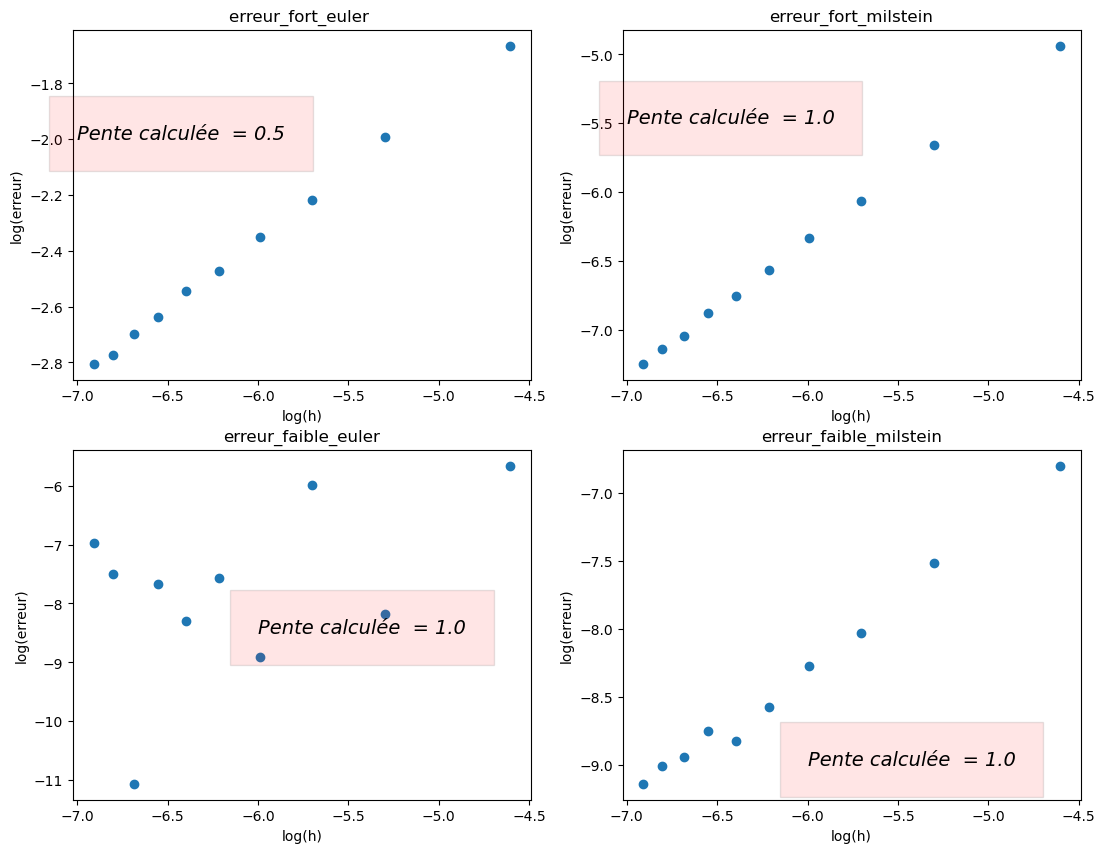

In [22]:
N = 10**4
T= 1
sigma = 0.20
r = 0.05
S0=80
list_h = 1 / np.linspace(1e3,1e2,10)


erreur_fort_euler, erreur_fort_milstein, erreur_faible_euler, erreur_faible_milstein = erreur(S0,T,r,sigma,list_h,N)

plt.figure(figsize=(13,10))

## erreur fort euler
plt.subplot(2,2,1)
plt.scatter(np.log(list_h),np.log(erreur_fort_euler), label ="erreur_fort_euler ")
plt.xlabel("log(h)")
plt.ylabel("log(erreur)")

slope,intercept = np.polyfit(np.log(list_h),np.log(erreur_fort_euler),deg=1)
textstr = 'Pente calculée  = '+str(round(slope,1))

plt.text(-7, -2, textstr, style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.1, 'pad': 20},fontsize=14)
plt.title("erreur_fort_euler ")

## erreur fort milstein
plt.subplot(2,2,2)
plt.scatter(np.log(list_h),np.log(erreur_fort_milstein), label = "erreur_fort_milstein")
plt.title("erreur_fort_milstein")
plt.xlabel("log(h)")
plt.ylabel("log(erreur)")

slope,intercept = np.polyfit(np.log(list_h),np.log(erreur_fort_milstein),deg=1)
textstr = 'Pente calculée  = '+str(round(slope,1))

plt.text(-7, -5.5, textstr, style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.1, 'pad': 20},fontsize=14)


plt.subplot(2,2,3)
plt.scatter(np.log(list_h),np.log(erreur_faible_euler), label = "erreur_faible_euler")
plt.title("erreur_faible_euler")
plt.xlabel("log(h)")
plt.ylabel("log(erreur)")

slope,intercept = np.polyfit(np.log(list_h),np.log(erreur_faible_euler),deg=1)
textstr = 'Pente calculée  = '+str(round(slope,1))

plt.text(-6, -8.5, textstr, style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.1, 'pad': 20},fontsize=14)

plt.subplot(2,2,4)
plt.scatter(np.log(list_h),np.log(erreur_faible_milstein), label = "erreur_faible_milstein")
plt.title("erreur_faible_milstein")
plt.xlabel("log(h)")
plt.ylabel("log(erreur)")

slope,intercept = np.polyfit(np.log(list_h),np.log(erreur_faible_milstein),deg=1)
textstr = 'Pente calculée  = '+str(round(slope,1))

plt.text(-6, -9, textstr, style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.1, 'pad': 20},fontsize=14)

Le tracé de l'erreur forte du schéma d'Euler a effectivement sur le graphe à échelle logarithmique l'allure d'une droite de pente 0.5. On retrouve bien l'ordre théorique : lorsqu'on divise par 10 le pas de temps, on divise par $\sqrt{10}$ l'erreur forte.

Le tracé de l'erreur faible du schéma d'Euler est plus erratique, il semble qu'il y ait une plus grande variance dans l'estimation de l'erreur. Néanmoins, on retrouve en moyenne une augmentation linéaire. De même pour le graphe à échelle logarithmique, on passe de à , ce qui correspond bien à une pente de 1.

Enfin, les erreurs fortes et faibles du schéma de Milstein ont la même pente que l'erreur faible du schéma d'Euler, on a donc bien un ordre de 1.

### Pricing d'un call dans le modèle d'Heston avec un shéma d'euler

Discrétisation par un schéma d'Euler :
$$
\left\{\begin{array}{l}
\hat{X}_{t+\Delta t}=\hat{X}_t+\left(r-\frac{\hat{v} t}{2}\right) \Delta t+\sqrt{\hat{v}_t} \sqrt{\Delta t} Z_1 \\
\hat{v}_{t+\Delta t}=\hat{v}_t-\lambda\left(\hat{v}_t-\bar{v}\right) \Delta t+\eta \sqrt{\hat{v}_t} \sqrt{\Delta t} Z_2
\end{array}\right.
$$
avec $Z_1$ et $Z_2$ gausiennes centrées réduites de corrélation $\rho$.

In [23]:
def simuleTrajectoireHeston(S0,T,r,v0, lambd, v, eta, rho, delta_t):

    St    = S0
    vt    = v0
    Xt    = np.log(St)
        
    for i in range(int(T/delta_t)):
            
#         prix.append(St)
#         vol.append(vt)
        
        Z1 = np.random.normal()
        Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal()
        
        Xt = Xt + (r - vt/2) * delta_t + np.sqrt(vt) * np.sqrt(delta_t) * Z1
        vt = max(0,vt -lambd * (vt - v) * delta_t + eta * np.sqrt(vt) * np.sqrt(delta_t) * Z2)
        #vt = np.abs(vt -lambd * (vt - v) * delta_t + eta * np.sqrt(vt) * np.sqrt(delta_t) * Z2)
        St = np.exp(Xt)
            
    return St

def Heston_MC(S0,K,T,r,v0, lambd, v, eta, rho, delta_t,n_sim):
         
    s = 0
    
    for i in range(n_sim):
        ST = simuleTrajectoireHeston(S0,T,r,v0, lambd, v, eta, rho, delta_t)
        payoff = np.exp(-r * T)* max(ST-K,0)
        s  = s + payoff
   
    return s / n_sim

In [24]:
def heston_model_sim(S0, v0, rho, kappa, theta, sigma,T, N, M):
    """
    Inputs:
     - S0, v0: initial parameters for asset and variance
     - rho   : correlation between asset returns and variance
     - kappa : rate of mean reversion in variance process
     - theta : long-term mean of variance process
     - sigma : vol of vol / volatility of variance process
     - T     : time of simulation
     - N     : number of time steps
     - M     : number of scenarios / simulations
    
    Outputs:
    - asset prices over time (numpy array)
    - variance over time (numpy array)
    """
    # initialise other parameters
    dt = T/N
    mu = np.array([0,0])
    cov = np.array([[1,rho],
                    [rho,1]])

    # arrays for storing prices and variances
    S = np.full(shape=(N+1,M), fill_value=S0)
    v = np.full(shape=(N+1,M), fill_value=v0)

    # sampling correlated brownian motions under risk-neutral measure
    Z = np.random.multivariate_normal(mu, cov, (N,M))

    for i in range(1,N+1):
        S[i] = S[i-1] * np.exp( (r - 0.5*v[i-1])*dt + np.sqrt(v[i-1] * dt) * Z[i-1,:,0] )
        v[i] = np.maximum(v[i-1] + kappa*(theta-v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt)*Z[i-1,:,1],0)
    
    return S, v

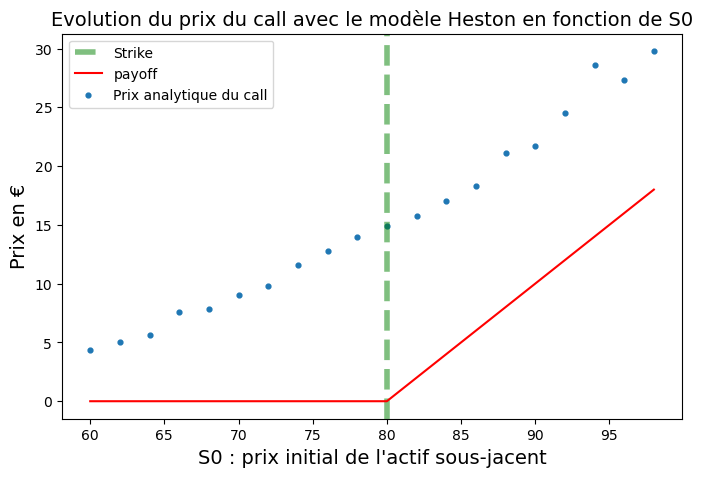

In [27]:
S0_list = [i for i in range(60,100,2)]
K= 80
prix = [Heston_MC(S0,K,T,r,v0, lambd, v, eta, rho, delta_t,n_sim) for S0 in S0_list]


## figure 1 
plt.figure(figsize=(8,5))
plt.axvline(x=K, ymin=0, ymax=1, color='green', alpha=0.5, linestyle='--', linewidth=4, label='Strike')
dr = [0 if i<K else i-K for i in S0_list]
plt.plot(S0_list,dr,color="red",label='payoff')
plt.scatter(S0_list,prix,label='Prix analytique du call',s=12)


plt.ylabel('Prix en €',fontsize=14)
plt.xlabel("S0 : prix initial de l'actif sous-jacent",fontsize=14)
plt.title("Evolution du prix du call avec le modèle Heston en fonction de S0",fontsize=14)
plt.legend()


## calcul de la la volatilité implicite de Black & Scholes par dichotomie

In [28]:
def Price_BS(sigma, strike, S=S0, T=T, r = r):

    d1 = (np.log(S/strike)+(r+sigma**2/2.)*(T))/(sigma*np.sqrt(T)) 
    
    d2 = d1-sigma*np.sqrt(T)
    return S*norm.cdf(d1)-strike*np.exp(-r*(T))*norm.cdf(d2)

def volatilite_implicite(S0,K,T,r, v0, lambd, v, eta, rho, delta_t, n_sim, epsilon):

    prix_heston = Heston_MC(S0,K,T,r,v0, lambd, v, eta, rho, delta_t,n_sim)
        
    sigma_inf   = 0.00001
    sigma_sup   = 10
    
    prix_BS_inf = Price_BS(sigma_inf,strike = K)
    prix_BS_sup = Price_BS(sigma_sup,strike = K)
    
    if prix_heston < prix_BS_inf:
        return 0
        
    while abs(0.5 * (prix_BS_inf + prix_BS_sup) - prix_heston) > epsilon:
        sigma   = 0.5 * (sigma_inf + sigma_sup)
        prix_BS = Price_BS(sigma,strike=K)
        if prix_BS_inf <= prix_heston <= prix_BS:
            sigma_sup   = sigma
            prix_BS_sup = prix_BS
        if prix_BS <= prix_heston <= prix_BS_sup:
            sigma_inf   = sigma
            prix_BS_inf = prix_BS
                
    return 0.5 * (sigma_inf + sigma_sup)

## smile de volatilité dans le modèle de Heston

Text(0, 0.5, 'Volatilité implicite')

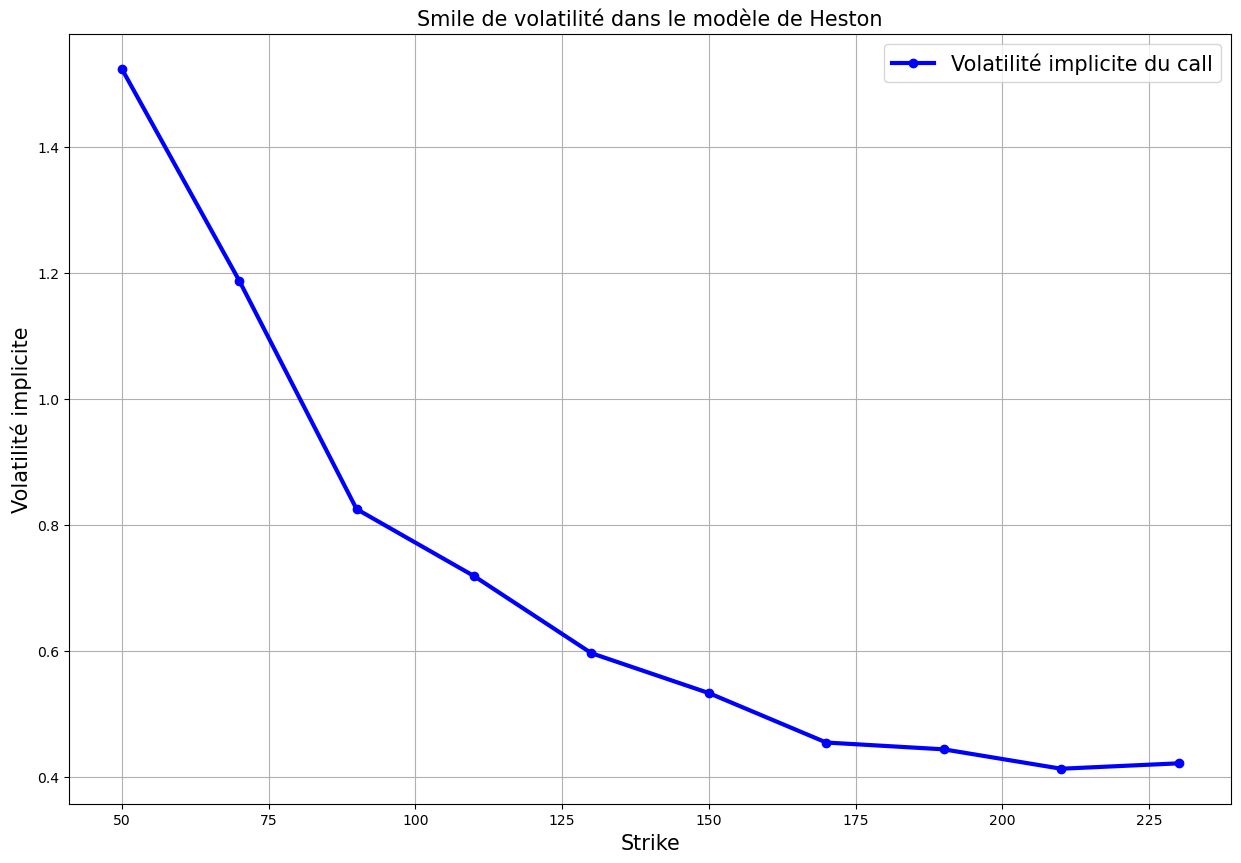

In [29]:
n_sim = 10**3
T= 1
sigma = 0.20
r = 0.05
S0=100
delta_t = 10**-2
v0                     = 0.2
lambd                  = 1
v                      = 0.2
eta                   = 0.5
rho                    = -0.7
epsilon                = 1e-4


list_K                 = [80 - 40 + 10 * i for i in range(1,20,2)]

smile = [volatilite_implicite(S0,K,T,r, v0, lambd, v, eta, rho, delta_t, n_sim, epsilon) for K in list_K]
        
plt.figure(figsize=(15,10))
plt.plot(list_K, smile, color='blue', label="Volatilité implicite du call", linewidth =3, marker = 'o')

plt.title("Smile de volatilité dans le modèle de Heston", fontsize=15)
plt.legend(fontsize=15)
plt.grid()

plt.xlabel('Strike', fontsize=15)
plt.ylabel('Volatilité implicite', fontsize=15)


#### Commentaire
On observe que la volatilité implicite est d'autant plus élevé que le strike est bas. Cela signifie que lorsque la probabilité d'exercer l'option est proche de 1, le modèle de Heston surestime la volatilité du marché (en comparaison à Black-Scholes), et par conséquent, l'option coûte plus chère. 

On en conclut que la différence entre un call pricé avec le modèle de Heston et le modèle de Black-Scholes apparaît pour les valeurs extrêmes de strike, où le modèle d'Heston a tendance à proposer une volatilité implicite plus élevée, et donc un prix de call plus élevé. On peut interpréter cela comme une manière de se prémunir de la part de la banque contre les événements extrêmes (un call non exercé alors que son strike est très bas ou encore un call exercé alors que son strike est très haut) en augmentant le prix du call et donc la marge.

A l'inverse, lorsque le strike se situe proche de $S_0$, la volatilité implicite est au plus bas, le prix de l'option sera donc inférieur au prix de Black-Scholes, et permet de rendre le produit plus compétitif.

## La déformation du smile de volatilité en fonction des paramètres de la dynamique de volatilité $\lambda, \eta$ et $\rho$.

100%|███████████████████████████████████████████| 10/10 [00:08<00:00,  1.20it/s]


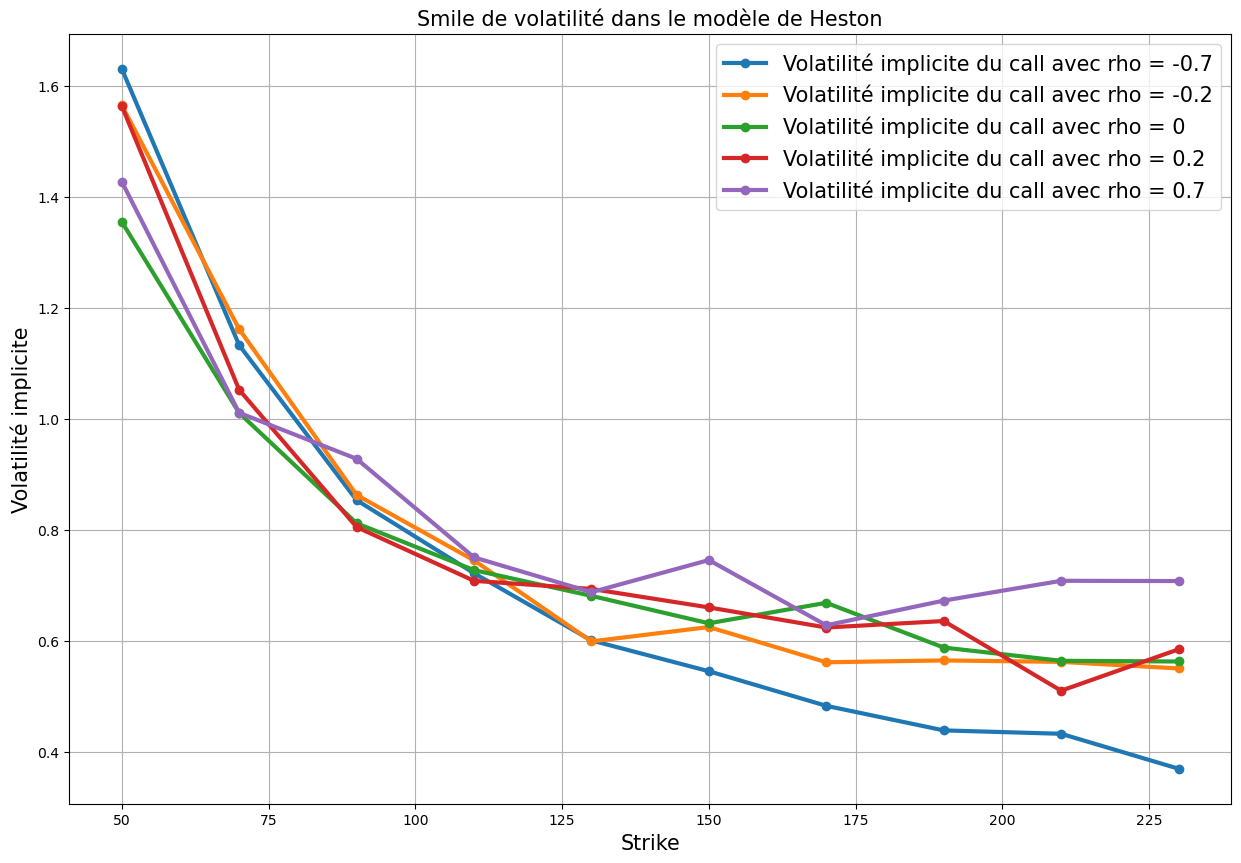

In [30]:
n_sim = 10**3
T= 1
sigma = 0.20
r = 0.05
S0=100
delta_t = 10**-2
v0                     = 0.2
lambd                  = 1
v                      = 0.2
eta                   = 0.5
list_rho                    = [-0.7,-0.2,0,0.2,0.7]
epsilon                = 1e-4

plt.figure(figsize=(15,10))

for rho in list_rho:
    
    list_K                 = [80 - 40 + 10 * i for i in range(1,20,2)]

    smile = [volatilite_implicite(S0,K,T,r, v0, lambd, v, eta, rho, delta_t, n_sim, epsilon) for K in list_K]

    
    plt.plot(list_K, smile, label="Volatilité implicite du call avec rho = "+str(rho), linewidth =3, marker = 'o')

    plt.title("Smile de volatilité dans le modèle de Heston", fontsize=15)
    plt.legend(fontsize=15)
    plt.grid()

    plt.xlabel('Strike', fontsize=15)
    plt.ylabel('Volatilité implicite', fontsize=15)

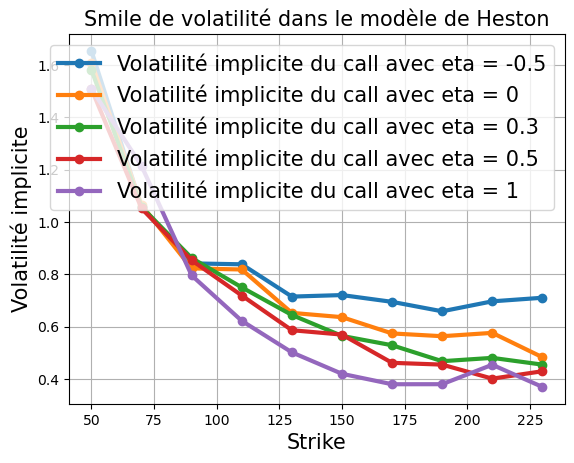

In [32]:
n_sim = 10**3
T= 1
sigma = 0.20
r = 0.05
S0=100
delta_t = 10**-2
v0                     = 0.2
lambd                  = 1
v                      = 0.2
list_eta               = [-0.5,0,0.3,0.5,1]
rho                    = -0.7
epsilon                = 1e-4

plt.figure(figsize=(15,10))

for eta in list_eta:
    
    list_K                 = [80 - 40 + 10 * i for i in range(1,20,2)]

    smile = [volatilite_implicite(S0,K,T,r, v0, lambd, v, eta, rho, delta_t, n_sim, epsilon) for K in list_K]

    
    plt.plot(list_K, smile, label="Volatilité implicite du call avec eta = "+str(eta), linewidth =3, marker = 'o')

    plt.title("Smile de volatilité dans le modèle de Heston", fontsize=15)
    plt.legend(fontsize=15)
    plt.grid()

    plt.xlabel('Strike', fontsize=15)
    plt.ylabel('Volatilité implicite', fontsize=15)

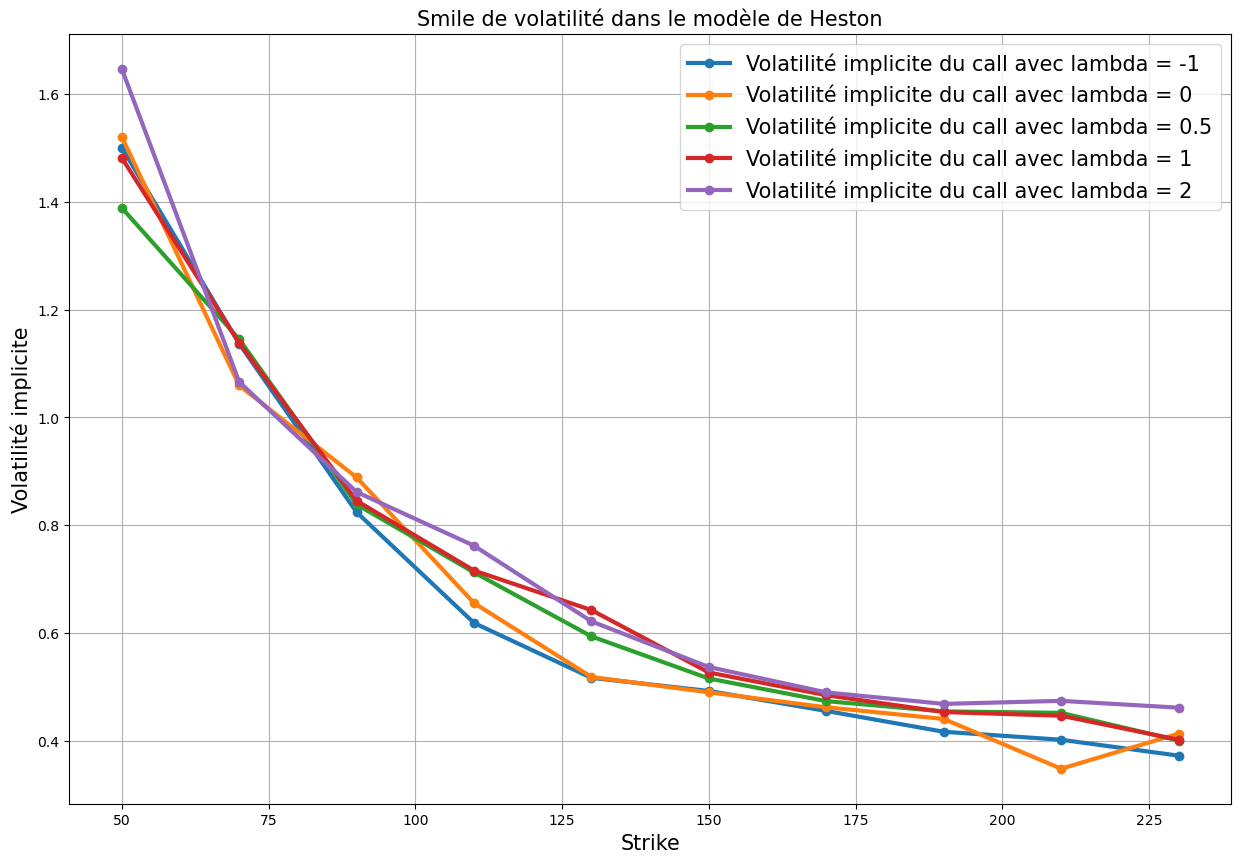

In [33]:
n_sim = 10**3
T= 1
sigma = 0.20
r = 0.05
S0=100
delta_t = 10**-2
v0                     = 0.2
list_lambd                  = [-1,0,0.5,1,2]
v                      = 0.2
eta                   = 0.5
rho                    = -0.7
epsilon                = 1e-4

plt.figure(figsize=(15,10))

for lambd in list_lambd:
    
    list_K                 = [80 - 40 + 10 * i for i in range(1,20,2)]

    smile = [volatilite_implicite(S0,K,T,r, v0, lambd, v, eta, rho, delta_t, n_sim, epsilon) for K in list_K]

    
    plt.plot(list_K, smile, label="Volatilité implicite du call avec lambda = "+str(lambd), linewidth =3, marker = 'o')

    plt.title("Smile de volatilité dans le modèle de Heston", fontsize=15)
    plt.legend(fontsize=15)
    plt.grid()

    plt.xlabel('Strike', fontsize=15)
    plt.ylabel('Volatilité implicite', fontsize=15)